This tutorial walks you through a reinforcement learning example implemented with pybrain. 
We explore the td.py code. If you want to see the output without going through these steps, run td.py (python td.py). 

The first step is to import some general packages and the RL components from PyBrain.


In [1]:
""" This example demonstrates how to use the discrete Temporal Difference
Reinforcement Learning algorithms (SARSA, Q, Q(lambda)) in a classical
fully observable MDP maze task. The goal point is the top right free
field. """
from scipy import *
import sys, time
import pylab

#from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from maze import Maze
from mdp import MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, QLambda, SARSA #@UnusedImport
from pybrain.rl.explorers import BoltzmannExplorer #@UnusedImport
from pybrain.rl.experiments import Experiment
from pybrain.rl.environments import Task

Now we specify the environment in which the agent interacts. Take a look at the file maze.py. It implements the Environment class in pybrain. In the next tutorial we will go through the maze.py implementation in more detail. For now, note that the performAction() method specifies what to do according to the action chosen by the agent. 

In this example we specify the environment as a maze.  It creates a labyrinth with free fields, walls, and an goal point. An agent can move over the free fields and needs to find the goal point. Let’s define the maze structure, a simple 2D numpy array, where 1 is a wall and 0 is a free field:

In [2]:
# create the maze with walls (1)
envmatrix = array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 1, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1]])



Then we create the environment with the structure as first parameter and the goal field tuple as second parameter:

In [3]:
#goal is set to cell 7,7
env = Maze(envmatrix, (7, 7))

Next we specify the agent. 

In [4]:
table = ActionValueTable(81, 4)
table.initialize(1.)



create agent with controller and learner - use SARSA(), Q() or QLambda() here. We are using Q-learning. 

In [5]:
learner = Q()


standard exploration is e-greedy, but a different type can be chosen as well. For example, learner.explorer = BoltzmannExplorer(). 

In [6]:
agent = LearningAgent(table, learner)

create the task and the experiment. Task is implemented in the mdp.py file. Open the mdp.py and try to understand what is included in the task. In the mdp.py file, there is a class MDPMazeTask, which implements the Task class in pybrain. Note that the reward function is defined in the Task class (see getReward() function). Take a good look at the reward function. What is the reward the agent getting? (Answer: it gets a positive reward, which is equal to 1, only when it reaches the goal, in all the other states it receives no reward (reward = 0)) 
If inerested play with this reward function, see how it affects the behavior of the agent. 

In [7]:
task = MDPMazeTask(env)
experiment = Experiment(task, agent)

Now the training begins. In the for loop we specify the number of training episodes. Here we have set it to 1000. In each iteration the agent trieds 100 actions (that means 100 moves within the maze). Each move results in learning and updating the Q-table. After one training episode (100 moves), we call the agent.reset() function. This function is implemented in the environment in maze.py. Note that the reset() function does not reset the knowledge gained so far through learning (Q-table), instead it initializes the environment (rewards, maze, and other parameters used in the computation) to begin a new training episode.   

In [12]:
%matplotlib inline


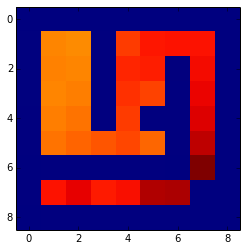

In [ ]:
import time
import matplotlib.pyplot as plt
from IPython import display

for i in range(1000):
    experiment.doInteractions(100)
    agent.learn()
    agent.reset()

    display.clear_output(wait=True)
    plt.imshow(table.params.reshape(81,4).max(1).reshape(9,9), interpolation='none')
    display.display(plt.gcf())
    time.sleep(0.1)
    
    #pylab.pcolor(table.params.reshape(81,4).max(1).reshape(9,9))
    #pylab.draw()
    #pylab.ion()
    #pylab.show()
    
print "training complete"